
![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

  # Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout

# Metricas Modelos
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

# setup
plt.style.use('seaborn-v0_8')
plt.rcParams["figure.figsize"] = (5, 4)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('max_colwidth', None)

In [3]:
from typing import Dict

def performance_regressor(
        y_true: np.array,
        y_pred: np.array,
        view_plot: bool=True,
        view_stats: bool=False
    )->Dict:
    """"""

    model_score: Dict = dict(
        r2=r2_score(y_true, y_pred),
        rmse=mean_squared_error(y_true, y_pred, squared=False),
        mse=mean_squared_error(y_true, y_pred),
        mae=mean_absolute_percentage_error(y_true, y_pred),
        mape=mean_absolute_error(y_true, y_pred)
    )

    if view_plot:
        df = pd.DataFrame({
            'predictions':y_pred,
            'residuals':y_true - y_pred,
            'real':y_true
        })

        fig, axes = plt.subplots(1, 2, squeeze=False, figsize=(10, 5))
        plot_params = {
            'x':'predictions',
            'data':df,
            'color':'black',
            'scatter_kws':{'alpha':0.3, 's':10}
        }

        sns.residplot(ax=axes[0, 0], y='residuals', **plot_params)
        sns.regplot(ax=axes[0, 1], y='real', **plot_params)

    if view_stats:
        for k, v in model_score.items():
            print(f'{k}:', v)

    return model_score

In [4]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


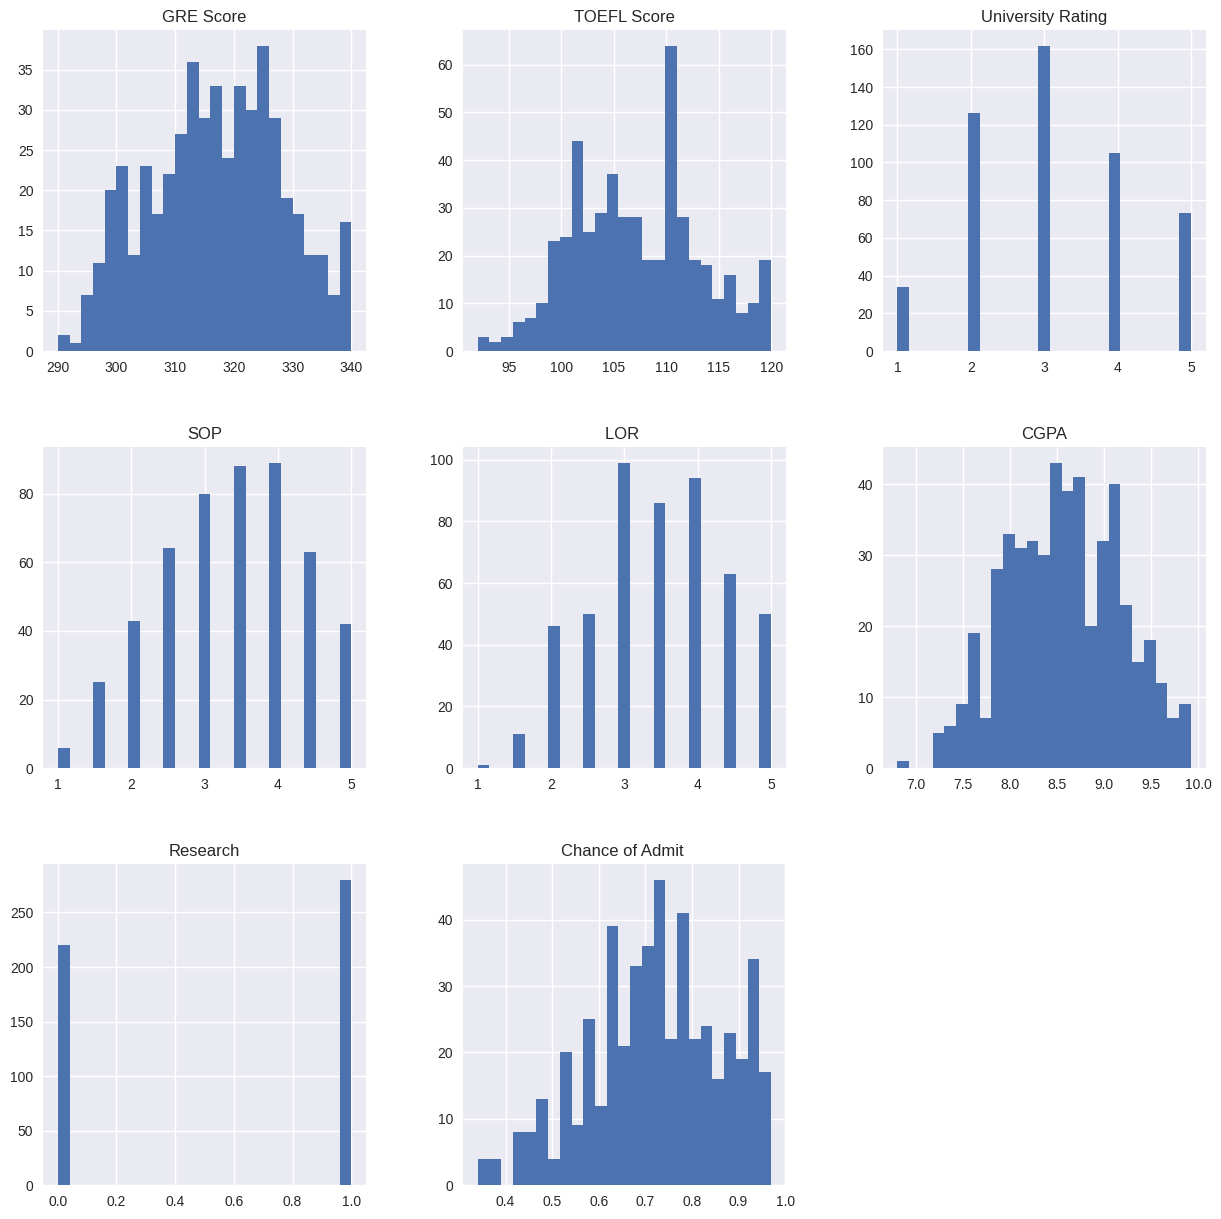

In [5]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [6]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [7]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

In [8]:
# Separación de variables predictoras (X) y variable de interés (y) en set de final entrenamiento y validacion usandola función train_test_split
xTrain_f, xVal, yTrain_f, yVal = train_test_split(xTrain,yTrain,test_size=0.1, random_state=22)

In [ ]:
xTrain_f.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,316.692063,107.406349,3.120635,3.392063,3.509524,8.592730,0.555556
std,11.463196,6.189159,1.144658,1.006872,0.904644,0.596915,0.497695
min,290.000000,92.000000,1.000000,1.000000,1.500000,7.210000,0.000000
25%,309.000000,103.000000,2.000000,2.500000,3.000000,8.130000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.570000,1.000000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000


In [ ]:
yTrain_f.describe()

count    315.000000
mean       0.724317
std        0.139315
min        0.340000
25%        0.635000
50%        0.730000
75%        0.820000
max        0.970000
Name: Chance of Admit , dtype: float64

In [9]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()
scaler.fit(xTrain_f)


# Transformación de los set de entrenamiento y test
xTrain_f = pd.DataFrame(data=scaler.transform(xTrain_f), columns=xTrain.columns, index=xTrain_f.index)
xTest = pd.DataFrame(data=scaler.transform(xTest), columns=xTest.columns, index=xTest.index)
xVal = pd.DataFrame(data=scaler.transform(xVal), columns=xVal.columns, index=xVal.index)

xTrain_f = np.array(xTrain_f)
yTrain_f = np.array(yTrain_f)

xVal = np.array(xVal)
yVal = np.array(yVal)

xTest = np.array(xTest)
yTest = np.array(yTest)

In [10]:
yTrain.shape

(350,)

In [11]:
# Definición de dimensiones de salida, varaibles de interés
output_var = 1
print(output_var, ' output variables')

# Definición de dimensiones de entrada, varaibles predictoras
dims = xTrain_f.shape[1]
print(dims, 'input variables')

1  output variables
7 input variables


## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# !pip install livelossplot

In [16]:
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

In [ ]:
# Celda 1
# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))


# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 8 (32.00 Byte)
Trainable params: 8 (32.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae'])

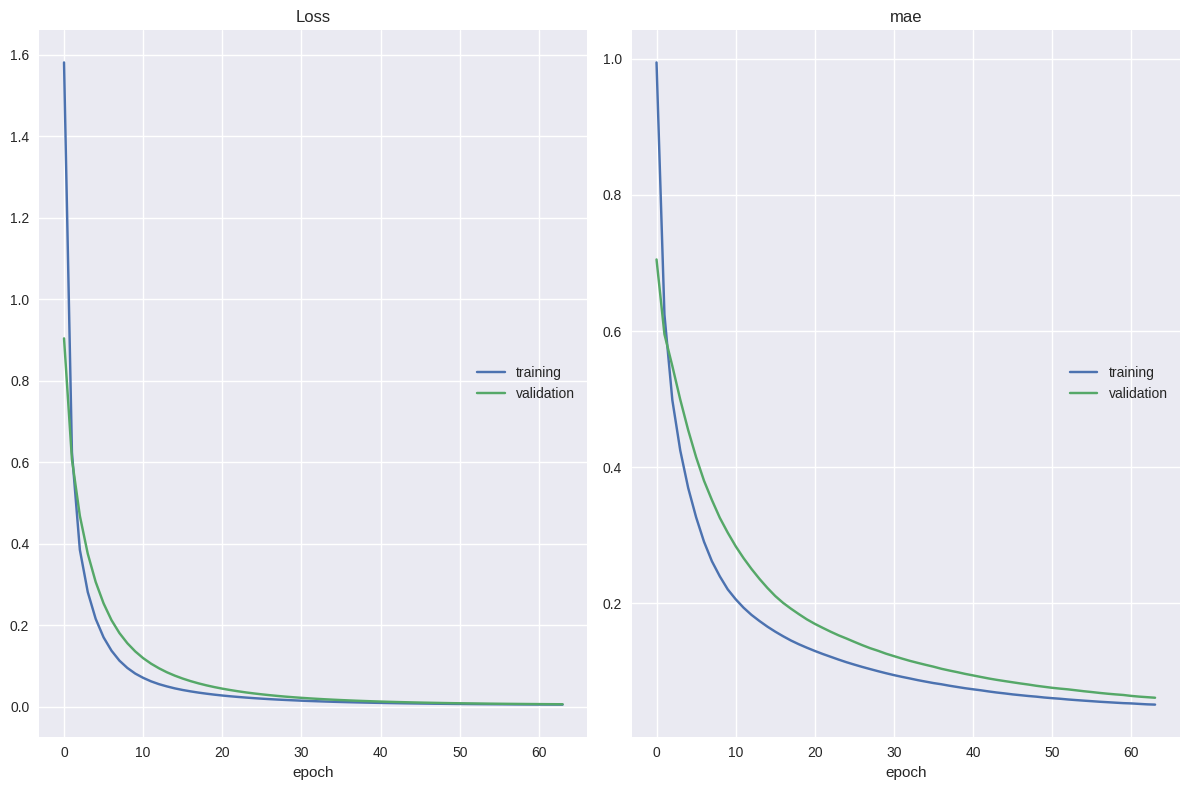

Loss
	training         	 (min:    0.005, max:    1.581, cur:    0.005)
	validation       	 (min:    0.006, max:    0.904, cur:    0.006)
mae
	training         	 (min:    0.051, max:    0.995, cur:    0.051)
	validation       	 (min:    0.061, max:    0.705, cur:    0.061)
10/10 [==============================] - 1s 82ms/step - loss: 0.0049 - mae: 0.0512 - val_loss: 0.0058 - val_mae: 0.0613


In [ ]:
# Entrenamiento de la red neuronal con 60 épocas
history=model.fit(xTrain_f, yTrain_f,
          verbose=1,
          epochs=64,
          validation_data=(xVal, yVal),
          callbacks=[PlotLossesKeras()])



5/5 [==============================] - 0s 3ms/step
MSE: 0.004173659507507357
MAE: 0.07878734268722126


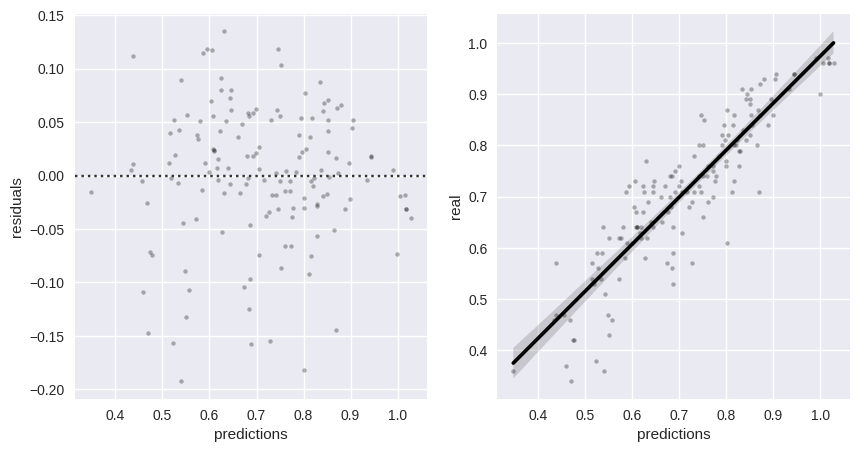

In [ ]:
y_pred = model.predict(xTest)
metrics_one_layer_p1 = \
    performance_regressor(yTest, y_pred.ravel())

mse = metrics_one_layer_p1.get('mse')
mae = metrics_one_layer_p1.get('mae')

print(f'MSE: {mse}')
print(f'MAE: {mae}')

Como se puede ver usando una red neuronal de una capa se obtiene un mse de 0.00417 y un mae de 0.07879 lo que indica que el modelo esta teniendo un muy buen desempeño considerando que estos valores son menores  que la media de la variable predictora (0.72) y su desviacion (0.13)

El MSE es una metrica que mide el promedio de los cuadrados de las diferencias entre los valores predichos y los valores reales. Un MSE más bajo indica un mejor ajuste del modelo a los datos. El MAE por otro lado es la media de las diferencias absolutas entre las predicciones del modelo y los valores reales.

En cuanto a la grafica de perdida se puede ver que la grafica empieza a disminuir en menor medida a partir del periodo 10 mas o menos y que converge y se estabiliza a partir de la 40 aproximadamente lo que quiere decir que el modelo ya no mejorara significativamente su rendimiento, adicionalmente la perdida en validacion y entrenamiento es 0.0049 y  0.0058 respectivamente, para la función de perdida `mean_squared_error` estos valores indican que el modelo esta haciendo buenas prediciones pues la perdida es bastante baja.

Se utiliza el optimizador SGD (Stochastic Gradient Descent), al igual que el descenso de gradiente estándar, el SGD actualiza iterativamente los pesos de la red neuronal para minimizar la función de pérdida. Para cada paso de entrenamiento, calcula el gradiente de la función de pérdida con respecto a los pesos y ajusta los pesos en la dirección opuesta al gradiente.
SGD: " Es un enfoque popular entre los optimizadores en el aprendizaje profundo. El término "estocástico" denota el elemento de aleatoriedad en el que se basa el algoritmo. En el descenso de gradiente estocástico, en lugar de procesar todo el conjunto de datos durante cada iteración, seleccionamos lotes de datos al azar. Esto implica que solo se consideran unas pocas muestras del conjunto de datos a la vez, lo que permite una optimización más eficiente y computacionalmente factible en los modelos de aprendizaje profundo."[1]

En cuanto a la funcion de activacion se debe hacer la seleccion adecuada con el fin de mejorar los resultados de la red neuronal. Por lo tanto en este caso se uso la funcion ReLU (Rectified Linear Unit), ya que hace parte de las funciones no lineales las cuales son conocidas por ser las funciones de activación más utilizadas. Facilitan que un modelo de red neuronal se adapte a una variedad de datos y diferencie entre los resultados, una ventaja de esta funcion es no activa todas las neuronas al mismo tiempo, lo que la hace mucho más eficiente computacionalmente en comparación con las funciones sigmoide y la funcion Tanh.[2][3]

Para la funcion de perdida dado que es un ejercicio de regresion se considero usar el MSE ya que al entrenar con error cuadrático medio el modelo tienen menos valores atípicos o al menos valores atípicos menos graves que los modelos entrenados con error absoluto medio (MAE), porque el MSE prioriza una gran cantidad de pequeños errores sobre unos pocos errores grandes.[4]

Teniendo en cuenta estos parametros y que los resultados obtenidos a partir de estos dieron como resultado un modelo con buen desempeño, se usaran estos parametros en los siguientes puntos con el fin de comparar los resultados.

[1] A Comprehensive Guide on Optimizers in Deep Learning: https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/

[2]Fundamentals of Deep Learning – Activation Functions and When to Use Them?:https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/
[3] Activation Functions Neural Networks: A Quick & Complete Guide: https://www.analyticsvidhya.com/blog/2021/04/activation-functions-and-their-derivatives-a-quick-complete-guide/

[4] Basic Introduction to Loss Functions: https://www.analyticsvidhya.com/blog/2022/08/basic-introduction-to-loss-functions/

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 2

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 18561 (72.50 KB)
Trainable params: 18561 (72.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['mae'])

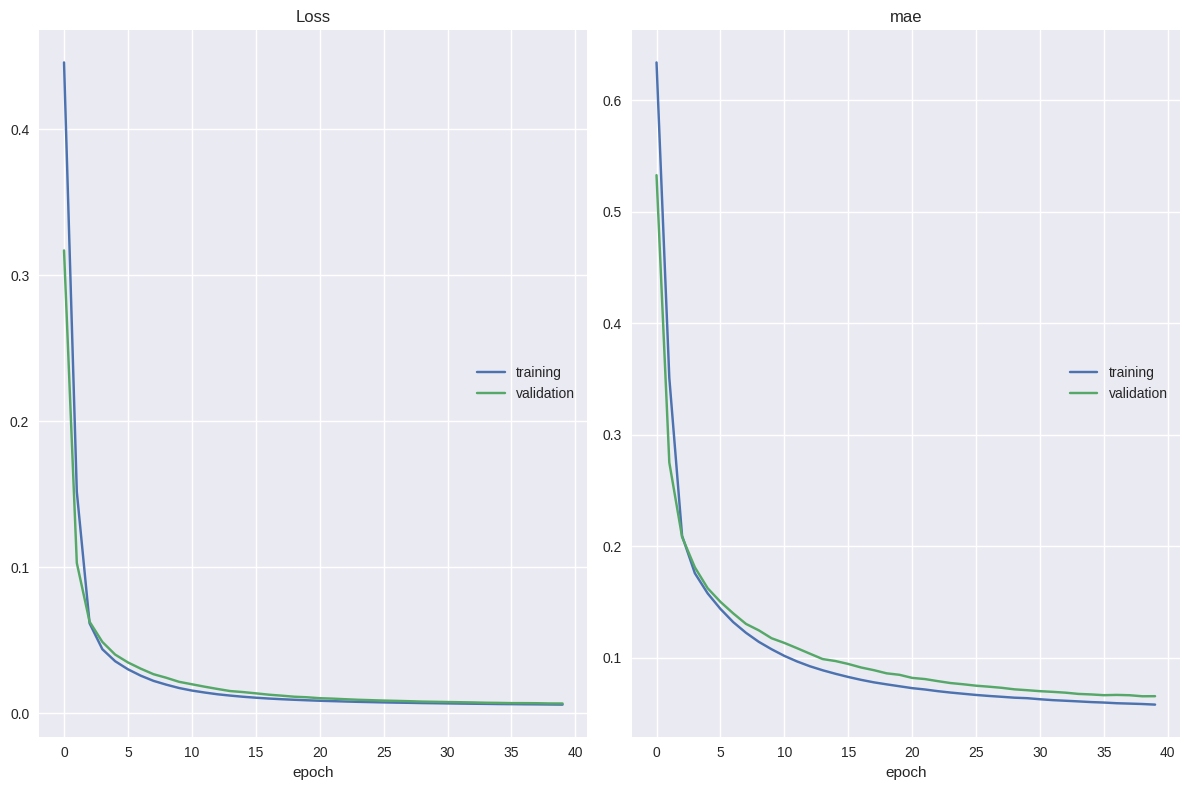

Loss
	training         	 (min:    0.006, max:    0.446, cur:    0.006)
	validation       	 (min:    0.007, max:    0.317, cur:    0.007)
mae
	training         	 (min:    0.058, max:    0.634, cur:    0.058)
	validation       	 (min:    0.065, max:    0.533, cur:    0.065)
10/10 [==============================] - 1s 87ms/step - loss: 0.0058 - mae: 0.0578 - val_loss: 0.0066 - val_mae: 0.0654


In [ ]:
# Entrenamiento de la red neuronal con 40 épocas
model.fit(xTrain_f, yTrain_f,
          epochs=40,
          validation_data=(xVal, yVal),
          callbacks=[PlotLossesKeras()])

5/5 [==============================] - 0s 3ms/step
MSE: 0.005512634207515616
MAE: 0.0932160510736902


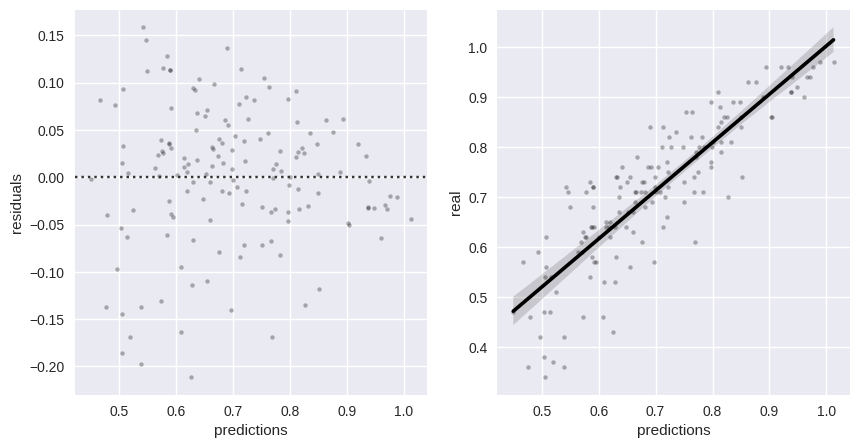

In [ ]:
y_pred = model.predict(xTest)
metrics_multi_layer_p2 = \
    performance_regressor(yTest, y_pred.ravel())

mse_multi = metrics_multi_layer_p2.get('mse')
mae_multi = metrics_multi_layer_p2.get('mae')

print(f'MSE: {mse_multi}')
print(f'MAE: {mae_multi}')

Usando los mismos parametros que la red de una capa se observan los siguientes resultados:
De los resultados de la muestra de entrenamiento y validacion usando el MSE como funcion de perdida en la grafica se puede observar que empieza a disminuir en menor medida a partir del periodo 5 mas o menos, mientras que en la epoca 20 aproximadente la grafica converge es decir que aunque se realice entrenamiento adicional el desempeño del modelo no mejorara significativamente, sin embargo comparandolo con el modelo que una capa se puede observar que la convergancia se alcanzo mas rapido, en este caso los resultado obetnido para la perdida en validacion y entrenamiento fueron 0.0058 y 0.0066 respectivamente que aunque en validacion es ligeramente mas alto sigue significando un buen desempeño pues los valores de perdida son bajos

En cuanto al desempeño en la data de Test se obtiene un mse de  0.0055 y un mae de 0.0932, lo que implica tambien que el modelo esta teniendo un buen desempeño a la hora de realizar predicciones en data que no habia "visto" antes pues se obtuvieron valores menores que la media y la desviacion de la variable predictora 0.72 y 0.13 respectivamente.

El MSE es una métrica que mide el promedio de los cuadrados de las diferencias entre los valores predichos y los valores reales. Un MSE más bajo indica un mejor ajuste del modelo a los datos. El MAE por otro lado es la media de las diferencias absolutas entre las predicciones del modelo y los valores reales.


Se utiliza el optimizador SGD (Stochastic Gradient Descent), al igual que el descenso de gradiente estándar, el SGD actualiza iterativamente los pesos de la red neuronal para minimizar la función de pérdida. Para cada paso de entrenamiento, calcula el gradiente de la función de pérdida con respecto a los pesos y ajusta los pesos en la dirección opuesta al gradiente.
SGD: " Es un enfoque popular entre los optimizadores en el aprendizaje profundo. El término "estocástico" denota el elemento de aleatoriedad en el que se basa el algoritmo. En el descenso de gradiente estocástico, en lugar de procesar todo el conjunto de datos durante cada iteración, seleccionamos lotes de datos al azar. Esto implica que solo se consideran unas pocas muestras del conjunto de datos a la vez, lo que permite una optimización más eficiente y computacionalmente factible en los modelos de aprendizaje profundo."[1]

En cuanto a la funcion de activacion se debe hacer la seleccion adecuada con el fin de mejorar los resultados de la red neuronal. Por lo tanto en este caso se uso la funcion ReLU (Rectified Linear Unit), ya que hace parte de las funciones no lineales las cuales son conocidas por ser las funciones de activación más utilizadas. Facilitan que un modelo de red neuronal se adapte a una variedad de datos y diferencie entre los resultados, una ventaja de esta funcion es no activa todas las neuronas al mismo tiempo, lo que la hace mucho más eficiente computacionalmente en comparación con las funciones sigmoide y la funcion Tanh.[2][3]

Para la funcion de perdida dado que es un ejercicio de regresion se considero usar el MSE ya que al entrenar con error cuadrático medio el modelo tienen menos valores atípicos o al menos valores atípicos menos graves que los modelos entrenados con error absoluto medio (MAE), porque el MSE prioriza una gran cantidad de pequeños errores sobre unos pocos errores grandes.[4]


## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [25]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [26]:
# Celda 3

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error',metrics=['mse','mae'])

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 18561 (72.50 KB)
Trainable params: 18561 (72.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [27]:

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.keras'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

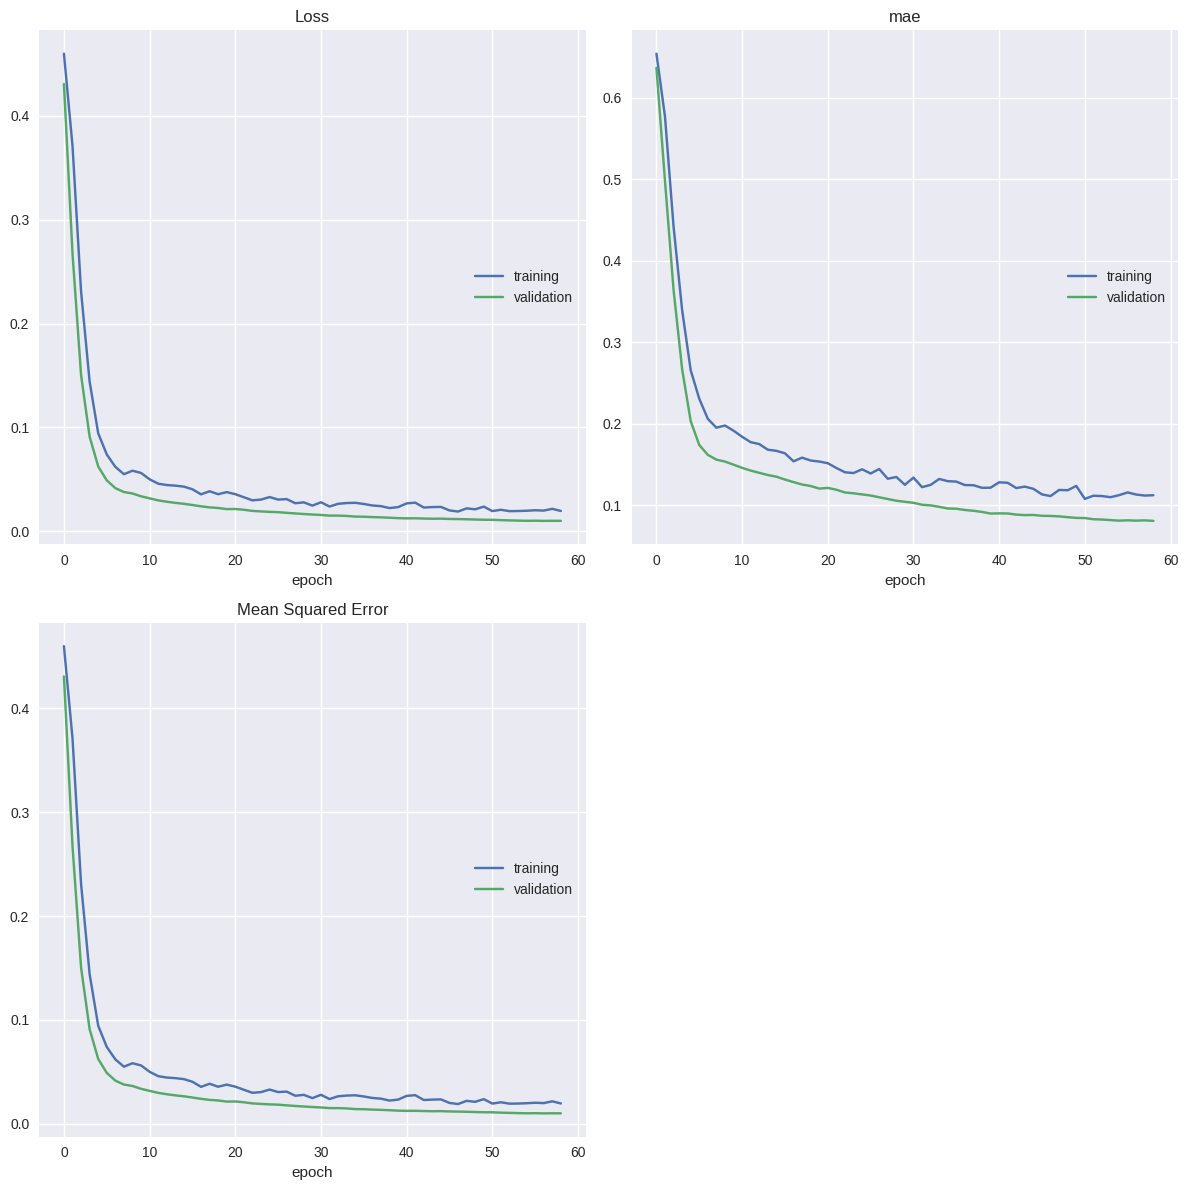

Loss
	training         	 (min:    0.019, max:    0.460, cur:    0.020)
	validation       	 (min:    0.010, max:    0.431, cur:    0.010)
mae
	training         	 (min:    0.108, max:    0.654, cur:    0.112)
	validation       	 (min:    0.081, max:    0.637, cur:    0.081)
Mean Squared Error
	training         	 (min:    0.019, max:    0.460, cur:    0.020)
	validation       	 (min:    0.010, max:    0.431, cur:    0.010)
3/3 [==============================] - 1s 416ms/step - loss: 0.0197 - mse: 0.0197 - mae: 0.1121 - val_loss: 0.0102 - val_mse: 0.0102 - val_mae: 0.0807
Epoch 59: early stopping


In [28]:
# Entrenamiento de la red neuronal con 60 épocas y early stopping
model.fit(xTrain_f, yTrain_f,
          verbose=True,
          epochs=60,
          batch_size=128,
          validation_data=(xVal,yVal),
          callbacks=[best_model, early_stop, PlotLossesKeras()])

5/5 [==============================] - 0s 2ms/step
MSE: 0.010593171257852658
MAE: 0.1270841789510557


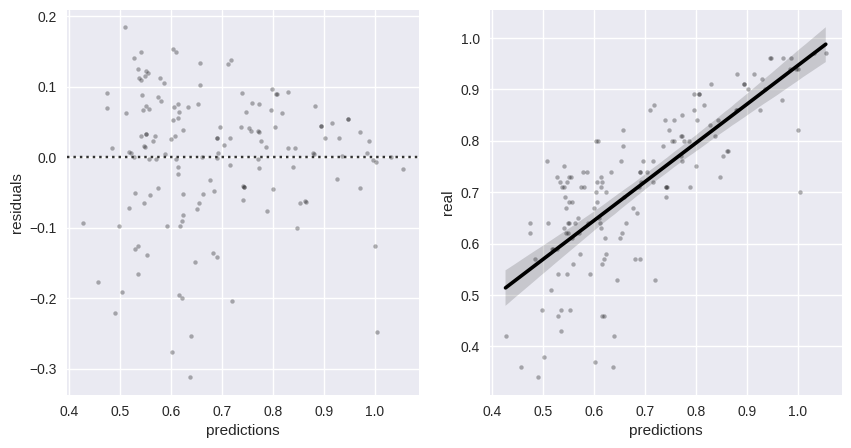

In [ ]:
y_pred = model.predict(xTest)
metrics_multi_layer_p3 = \
    performance_regressor(yTest, y_pred.ravel())

mse_stop = metrics_multi_layer_p3.get('mse')
mae_stop = metrics_multi_layer_p3.get('mae')

print(f'MSE: {mse_stop}')
print(f'MAE: {mae_stop}')

En este caso se utilizo una red neuronal multicapa usando los parametros definido en la red de una capa pero usando early stopping con un patience de 2  en la funcion de perdida en validacion y dropout:

De los resultados obtenidos se puede observar que el modelo alcanza a recorrer todas las epocas definidas pues es hasta la ultima epoca en donde los valores de perdida en validacion son iguales por lo que el modelo no se detiene anticipadamente. Tambien se puede observar que a partir de la epoca 25 aproximadente la perdida se estabiliza con los siguientes valores de perdida en entrenaimento y validacion loss: 0.0184 - val_loss: 0.0197 mientas que en la epoca 60 los valores son los siguientes loss: 0.0094 - val_loss: 0.0107

Adicionalmente se puede ver usando esta red neuronal multicapa que se obtiene un mse de  0.0105 y un mae de 0.127, lo que se podria considera un modelo relativamente bueno pues los valores son menores que la que la desviacion y media de y, sin embargo hay que tener encuenta que estos valores son mayores que aquellos obtenidos del modelo multicapa

El MSE por si solo no dice mucho pero es una metrica que mide el promedio de los cuadrados de las diferencias entre los valores predichos y los valores reales. Un MSE más bajo indica un mejor ajuste del modelo a los datos, el rmse es su raiz cuadrada. El MAE por otro lado es la media de las diferencias absolutas entre las predicciones del modelo y los valores reales.

Se utiliza el optimizador SGD (Stochastic Gradient Descent), al igual que el descenso de gradiente estándar, el SGD actualiza iterativamente los pesos de la red neuronal para minimizar la función de pérdida. Para cada paso de entrenamiento, calcula el gradiente de la función de pérdida con respecto a los pesos y ajusta los pesos en la dirección opuesta al gradiente.
SGD: " Es un enfoque popular entre los optimizadores en el aprendizaje profundo. El término "estocástico" denota el elemento de aleatoriedad en el que se basa el algoritmo. En el descenso de gradiente estocástico, en lugar de procesar todo el conjunto de datos durante cada iteración, seleccionamos lotes de datos al azar. Esto implica que solo se consideran unas pocas muestras del conjunto de datos a la vez, lo que permite una optimización más eficiente y computacionalmente factible en los modelos de aprendizaje profundo."[1]

En cuanto a la funcion de activacion se debe hacer la seleccion adecuada con el fin de mejorar los resultados de la red neuronal. Por lo tanto en este caso se uso la funcion ReLU (Rectified Linear Unit), ya que hace parte de las funciones no lineales las cuales son conocidas por ser las funciones de activación más utilizadas. Facilitan que un modelo de red neuronal se adapte a una variedad de datos y diferencie entre los resultados, una ventaja de esta funcion es no activa todas las neuronas al mismo tiempo, lo que la hace mucho más eficiente computacionalmente en comparación con las funciones sigmoide y la funcion Tanh.[2][3]

Para la funcion de perdida dado que es un ejercicio de regresion se considero usar el MSE ya que al entrenar con error cuadrático medio el modelo tienen menos valores atípicos o al menos valores atípicos menos graves que los modelos entrenados con error absoluto medio (MAE), porque el MSE prioriza una gran cantidad de pequeños errores sobre unos pocos errores grandes.[4]

La diferencia con la red neuronal anterior es:

Dropout: Es una técnica de regularización utilizada para prevenir el sobreajuste en redes neuronales. Durante el entrenamiento, se desactivan aleatoriamente un cierto porcentaje de neuronas en cada capa, lo que obliga a la red a aprender de manera más robusta. El valor de 0.2 en Dropout(0.2) indica que el 20% de las neuronas se desactivarán aleatoriamente durante cada paso de entrenamiento.

Early Stopping: Es una técnica para evitar el sobreajuste deteniendo el entrenamiento una vez que el rendimiento en un conjunto de validación deja de mejorar.

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [ ]:
# Celda 4
def plot_barh(df, title, xlabel, asc=False):
  ax = (
      df
      .sort_values(by='ejeY', ascending=asc)
      .plot(
          kind='barh', y='ejeY', x='ejeX', color='dodgerblue',
          title=title,
          xlabel=xlabel,
          ylabel=''
      )
  )
  ax.bar_label(ax.containers[0])
  plt.show()

ejeX = ['Red Una Capa', 'Red Multicapa','Red Multicapa Early Stopping']

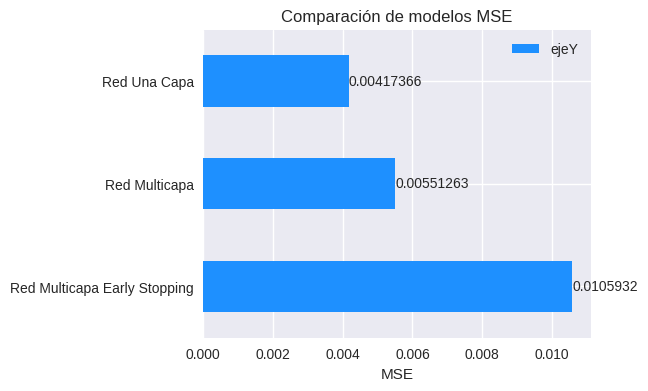

In [ ]:
 plot_barh(
    df=pd.DataFrame({'ejeX': ejeX, 'ejeY': [mse, mse_multi, mse_stop]}),
    title='Comparación de modelos MSE',
    xlabel='MSE'
)

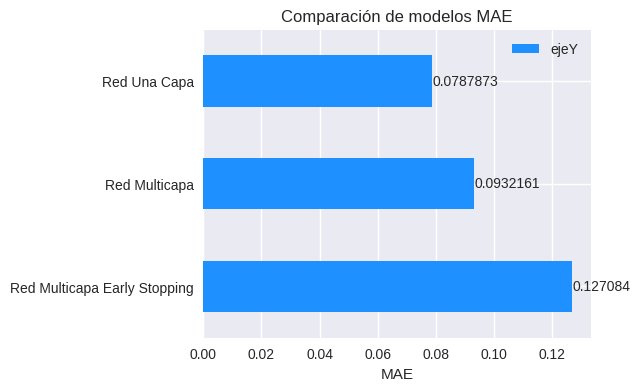

In [ ]:
 plot_barh(
    df=pd.DataFrame({'ejeX': ejeX, 'ejeY': [mae, mae_multi, mae_stop]}),
    title='Comparación de modelos MAE',
    xlabel='MAE'
)

Teniendo en cuenta los resultados obtenidos se puede observar que el modelo de que la red de una capa presento un mejor desempeño con respecto a los modelos multicapa

Ventajas del Modelo de una capa:
Algunas de las ventajas que tienen estos modelos es su simplicidad pues un modelo de una capa es conceptualmente mas simple y requiere menos recursos computacionales para entrenar y probar el modelo, por lo que puede ser una buena eleccion para tareas relativamente sencillas, adicionalmente otra de sus ventajas es la velocidad de entrenamiento ya que al haber menos parametros de pesos que actualizar el modelo de una capa puede converger mas rapido, finalmente otra ventaja es la interpretabilidad pues en algunos caso es mas facil entender el rol de cada neurona cuando hay pocas capas que considerar [5]

Desventajas del Modelo Multicapa early stopping:
Algunas de las desventajas de los modelos multicapa son la complejidad pues estos modelos suelen ser mas complejos en terminos de arquitectura y entrenamiento pues pueden requerir mas recursos computacionales para entrenar efectivamente, otra desventaja es que el entrenamiento es mas lento pues pueden llevar mas tiempo en converger y pueden llegar a ser mas suceptibles a quedarse atascados en un minimo local durante la optimizacion. Adicionalmente estos modelos pueden ser propensos a hacer overfitting si el modelo no esta bien regularizado o si la data de entrenamiento es muy pequeña[5]. En cuanto al early stopping esta "depende de la elección de la métrica y del parámetro de paciencia, que puede afectar al rendimiento y la convergencia del modelo. Además, puede ser sensible al ruido o a las fluctuaciones en los datos o la métrica de validación, lo que puede provocar una detención prematura o retrasada del entrenamiento. Por último, puede ser difícil determinar el punto óptimo de parada, ya que puede haber múltiples mínimos o máximos locales en la curva de validación."[6]

[5]What are the advantages and disadvantages of using a single hidden layer with many units in an artificial neural network compared to using multiple layers with fewer units each?: https://www.quora.com/What-are-the-advantages-and-disadvantages-of-using-a-single-hidden-layer-with-many-units-in-an-artificial-neural-network-compared-to-using-multiple-layers-with-fewer-units-each
[6]¿Qué es la detención temprana y cómo mejora la optimización del aprendizaje profundo?: https://www.linkedin.com/advice/0/what-early-stopping-how-does-improve-deep-5mn1e

